### **Chapter 6: Morphological Image Processing**

#### 1. **Dilation**

Dilation is another basic morphological operation that expands the size of the foreground objects, smooths object boundaries, and closes holes and gaps in a binary image. This is a dual operation of erosion. The following code snippet shows how to use the binary_dilation() function on Tagore's binary image with a disk structuring elements of different sizes

##### 1.1 Import các thư viện cần thiết

In [14]:
from skimage.io import imread
import matplotlib.pylab as pylab
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float


##### 1.2 Đọc ảnh và xử lý đầu vào

In [10]:
im = img_as_float(imread('tagore.png'))
im = 1 - im[...,3]

- imread('../images/tagore.png'): Đọc ảnh tagore.png.
- img_as_float(imread(...)): Chuyển ảnh sang dạng số thực (float), với các giá trị từ 0 đến 1.
- im[...,3]: Truy cập vào kênh alpha của ảnh (nếu là ảnh PNG với kênh trong suốt). Kênh alpha chứa thông tin về độ trong suốt (opacity) của ảnh.
- im = 1 - im[...,3]: Đảo ngược giá trị của kênh alpha để các vùng trong suốt trở thành vùng sáng (giá trị gần 1) và ngược lại.

##### 1.3 Chuyển ảnh thành nhị phân

In [7]:
im[im <= 0.5] = 0
im[im > 0.5] = 1

- im[im <= 0.5] = 0: Đặt các giá trị nhỏ hơn hoặc bằng 0.5 thành 0, biến chúng thành các pixel tối.
- im[im > 0.5] = 1: Đặt các giá trị lớn hơn 0.5 thành 1, biến chúng thành các pixel sáng.
- Kết quả là một ảnh nhị phân với chỉ hai giá trị: 0 (đen) và 1 (trắng).

##### 1.4 Thiết lập và hiển thị ảnh gốc

(-0.5, 252.5, 339.5, -0.5)

<Figure size 640x480 with 0 Axes>

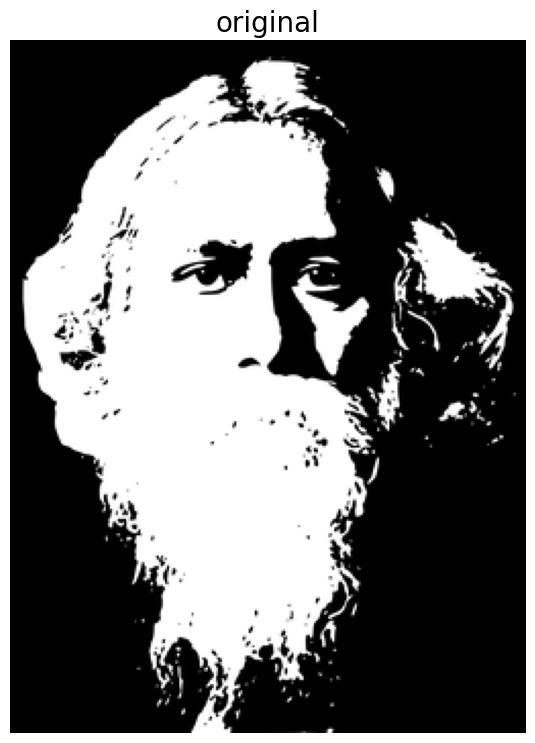

In [17]:
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.imshow(im)
pylab.title('original', size=20)
pylab.axis('off')

- pylab.gray(): Đặt chế độ hiển thị ảnh là grayscale.
- pylab.figure(figsize=(18,9)): Tạo một figure mới có kích thước 18x9 inch.
- pylab.imshow(im): Hiển thị ảnh nhị phân gốc (im).
- pylab.title('original', size=20): Đặt tiêu đề cho subplot là "original" với kích thước chữ là 20.
- pylab.axis('off'): Tắt hiển thị các trục.

##### 1.5 Áp dụng phép giãn nở với đĩa có kích thước thay đổi và hiển thị kết quả

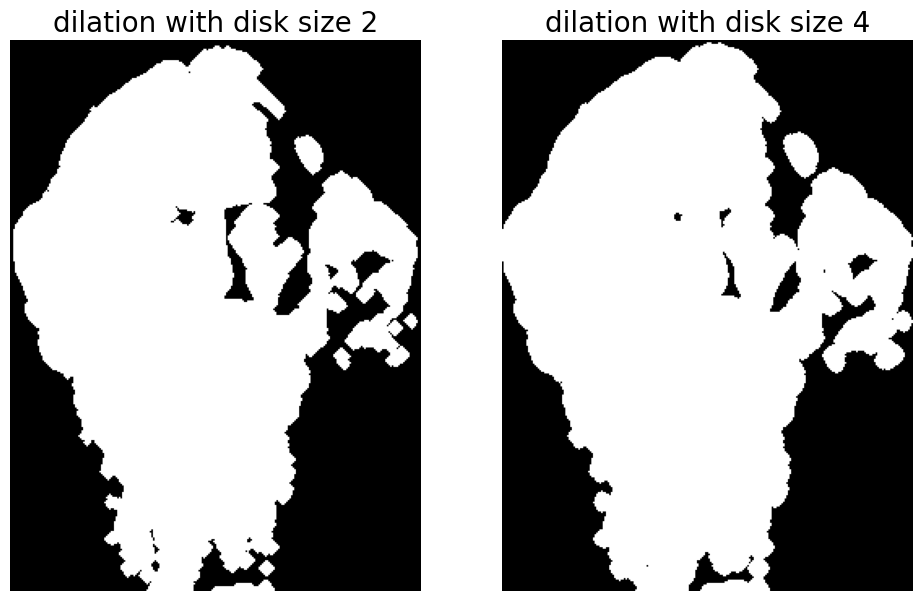

In [19]:
pylab.figure(figsize=(18,9))
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show()

- for d in range(1,3): Lặp qua các giá trị của d từ 1 đến 2 để thử các kích thước đĩa khác nhau cho phép giãn nở.
    - pylab.subplot(1,3,d+1): Tạo một subplot ở vị trí thứ hai và thứ ba trong lưới 1x3 để hiển thị kết quả của phép giãn nở.
    - im1 = binary_dilation(im, disk(2*d)): Áp dụng phép giãn nở (binary_dilation) lên ảnh nhị phân im, với kích thước đĩa là 2*d. Kích thước đĩa càng lớn thì độ dày của các đối tượng trong ảnh sau giãn nở càng tăng.
    - pylab.imshow(im1): Hiển thị ảnh sau khi giãn nở (im1).
    - pylab.title('dilation with disk size ' + str(2*d), size=20): Đặt tiêu đề cho mỗi ảnh, ghi kích thước đĩa đã sử dụng cho phép giãn nở.
    - pylab.axis('off'): Tắt hiển thị các trục.